# Placeholders

So far we have used **Variables** to manage our data, but there is a more basic structure, the **placeholder**. A **placeholder** is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In **TensorFlow** terminology, we then feed data into the graph through these placeholders.



In [1]:
import tensorflow as tf

x = tf.placeholder("float", 3)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


This example works a little differently from our previous ones, let’s break it down.

First, we import **tensorflow** as normal. Then we create a **placeholder** called x, i.e. a place in memory where we will store value later on. The 3 on this line denotes that we will store three values in this placeholder.

Then, we create a Tensor called, which is the operation of multiplying **x** by 2. Note that we haven’t defined any initial values for x yet.

We now have an operation (**y**) defined, and can now run it in a session. We create a session object, and then run just the y variable. Note that this means, that if we defined a much larger graph of operations, we can run just a small segment of the graph. This subgraph evaluation is actually a bit selling point of TensorFlow, and one that isn’t present in many other libraries that do similar things.

Running **y** requires knowledge about the values of **x**. We define these inside the **feed_dict** argument to run. We state here that the values of x are **[1, 2, 3]**. We run y, giving us the result of **[2, 4, 6]**.

Placeholders do not need to be statically sized. Let’s update our program to allow x to take on any length. Change the definition of x to be:

In [2]:
x = tf.placeholder("float", None)

Now, when we define the values of **x** in the **feed_dict** we can have any number of values. The code should still work, and give the same answer, but now it will also work with any number of values in **feed_dict**.

Placeholders can also have multiple dimensions, allowing for storing arrays. In the following example, we create a 3 by 2 matrix, and store some numbers in it. We then use the same operation as before to do element-wise doubling of the numbers.



In [4]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


The first dimension of the placeholder is **None**, meaning we can have any number of rows. The second dimension is fixed at 3, meaning each row needs to have three columns of data.

We can extend this to take an arbitrary number of **None** dimensions. In this example, we load up the image from our last lesson, then create a placeholder that stores a slice of that image. The slice is a 2D segment of the image, but each “pixel” has three components (red, green, blue). Therefore, we need **None** for the first two dimensions, but need **3** (or **None** would work) for the last dimension. We then use TensorFlow’s **slice** method to take a subsegment out of the image to operate on.

(3000, 3685, 3)


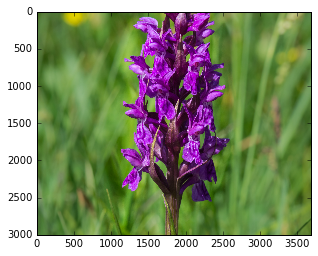

In [6]:
%matplotlib inline
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "images/MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)

image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()